In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
from option import Option
from underlying import GBM
from stochastic_mesh_func import *

In [3]:
float('np.infty')

ValueError: could not convert string to float: 'np.infty'

In [4]:
mu = 0.05
r = 0.05
sigma = 0.2
T = 1
values_per_year = 120

S0 = 100
K = 100

b = 1000

In [5]:
underlying = GBM(S0, mu, sigma, r, div = 10, div_freq = 12, next_div_moment = 0.1, values_per_year = values_per_year)

In [6]:
vanilla_call = Option(underlying, lambda X,t: np.maximum(X-K, 0), T)

In [7]:
V, bools, mesh, Q = stochastic_mesh(vanilla_call, b)

0.1
0.18333333333333335
0.26666666666666666
0.35
0.4333333333333333
0.5166666666666666
0.6
0.6833333333333333
0.7666666666666667
0.8500000000000001
0.9333333333333335


/Users/Michal/Desktop/Longstaff-Schwartz_app/underlying.py:58: RuntimeWarning: invalid value encountered in log
  numerator = np.exp(-(np.log(x_next/x_curr)-(self.r - 0.5*self.sigma**2)*dt)**2/(2*self.sigma**2*dt))
/Users/Michal/Desktop/Longstaff-Schwartz_app/stochastic_mesh_func.py:11: RuntimeWarning: invalid value encountered in true_divide
  return f_x_mesh / g_x_mesh


Text(0.5, 1.0, 'V0 = 7.995097268504406')

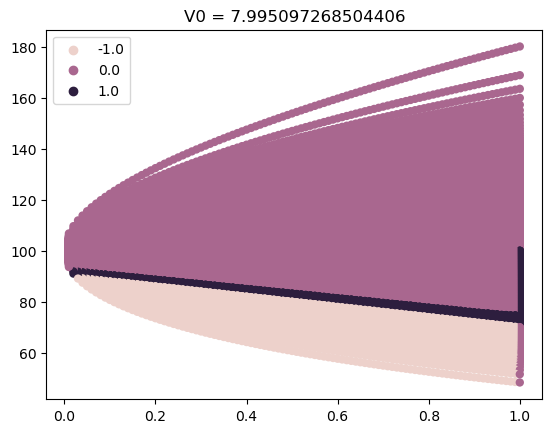

In [49]:
sb.scatterplot(x = (np.tile(np.arange(1, values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = mesh.flatten(), hue = bools.flatten(),linewidth=0).set_title(f'V0 = {V}')

Text(0.5, 1.0, 'V0 = 5.934548700986276')

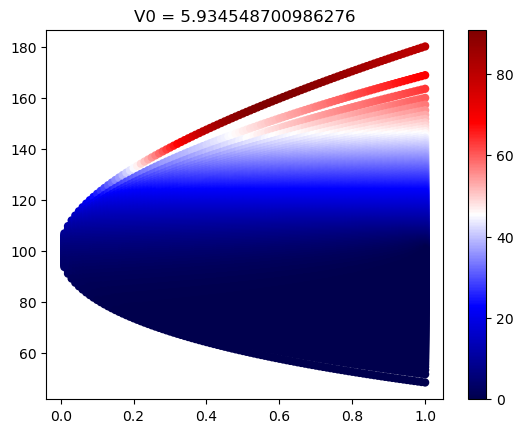

In [8]:
plt.scatter(x = (np.tile(np.arange(1,values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = (mesh).flatten(), c = Q.flatten(), cmap = 'seismic', linewidth=0)
plt.colorbar()
plt.title(f'V0 = {V}')

In [9]:
barrier = 150
call_up_out = Option(underlying, lambda X,t: np.maximum(X-K, 0), T, lambda X,t: X < barrier)

In [10]:
V, bools, mesh, Q = stochastic_mesh(call_up_out, b, True)

Text(0.5, 1.0, 'V0 = 5.927879656354681')

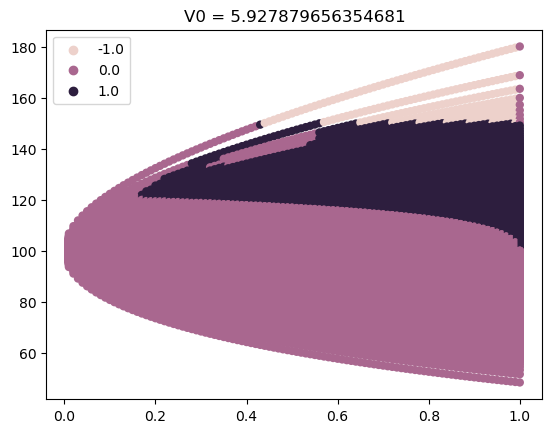

In [11]:
sb.scatterplot(x = (np.tile(np.arange(1, values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = mesh.flatten(), hue = bools.flatten(),linewidth=0).set_title(f'V0 = {V}')

Text(0.5, 1.0, 'V0 = 5.927879656354681')

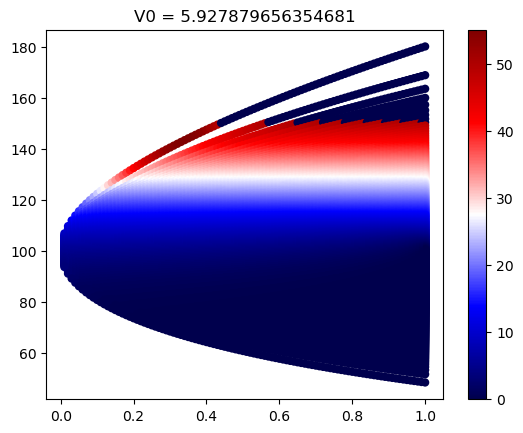

In [12]:
plt.scatter(x = (np.tile(np.arange(1,values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = (mesh).flatten(), c = Q.flatten(), cmap = 'seismic', linewidth=0)
plt.colorbar()
plt.title(f'V0 = {V}')

In [13]:
barrier = 150
call_down_in = Option(underlying, lambda X,t: np.maximum(X-K, 0), T, lambda X,t: X < barrier, False)

In [14]:
V, bools, mesh, Q = stochastic_mesh(call_down_in, b, True)

Text(0.5, 1.0, 'V0 = 5.9278798901232985')

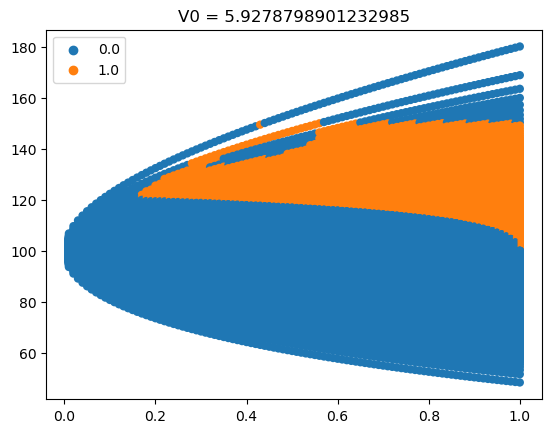

In [15]:
sb.scatterplot(x = (np.tile(np.arange(1, values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = mesh.flatten(), hue = bools.flatten(),linewidth=0).set_title(f'V0 = {V}')

Text(0.5, 1.0, 'V0 = 5.9278798901232985')

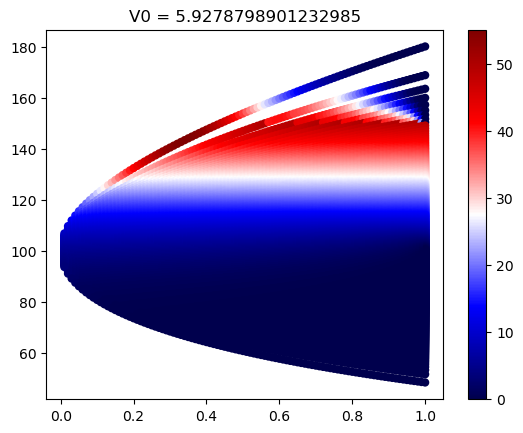

In [16]:
plt.scatter(x = (np.tile(np.arange(1,values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = (mesh).flatten(), c = Q.flatten(), cmap = 'seismic', linewidth=0)
plt.colorbar()
plt.title(f'V0 = {V}')

In [17]:
call_up_out = Option(underlying, lambda X,t: np.maximum(X-K, 0), T, lambda X,t: X < 110 + 50*t)

In [18]:
V, bools, mesh, Q = stochastic_mesh(call_up_out, b, True)

Text(0.5, 1.0, 'V0 = 5.729374837911238')

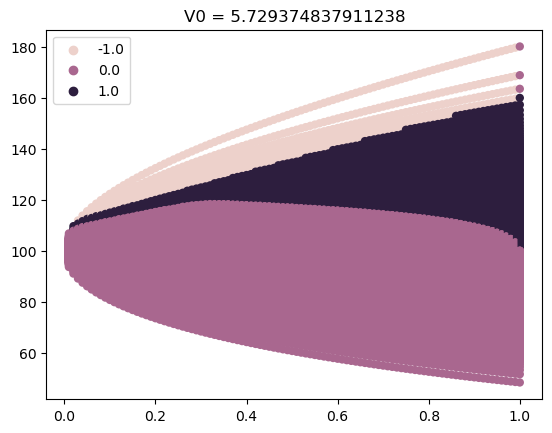

In [19]:
sb.scatterplot(x = (np.tile(np.arange(1, values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = mesh.flatten(), hue = bools.flatten(),linewidth=0).set_title(f'V0 = {V}')

Text(0.5, 1.0, 'V0 = 5.729374837911238')

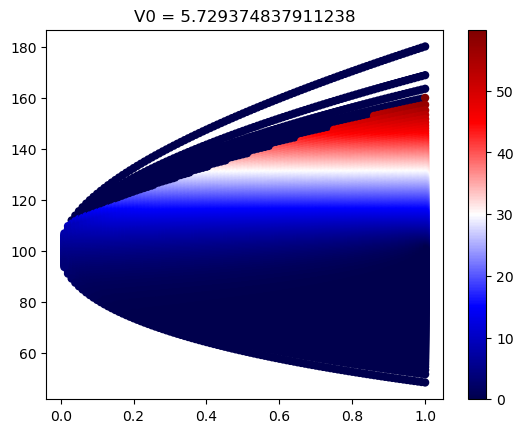

In [20]:
plt.scatter(x = (np.tile(np.arange(1,values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = (mesh).flatten(), c = Q.flatten(), cmap = 'seismic', linewidth=0)
plt.colorbar()
plt.title(f'V0 = {V}')

In [21]:
vanilla_put = Option(underlying, lambda X,t: np.maximum(K-X, 0), T)

In [22]:
V, bools, mesh, Q = stochastic_mesh(vanilla_put, b, True)

Text(0.5, 1.0, 'V0 = 9.96982813655917')

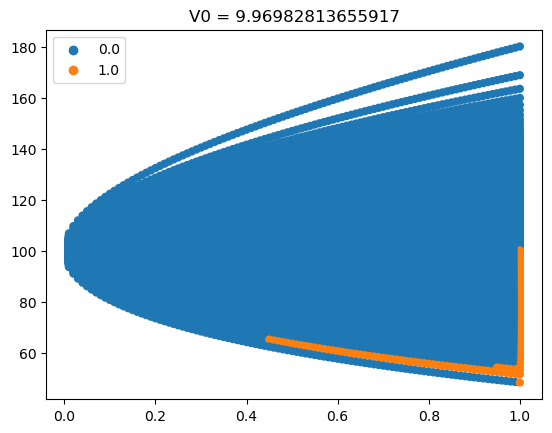

In [23]:
sb.scatterplot(x = (np.tile(np.arange(1, values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = mesh.flatten(), hue = bools.flatten(),linewidth=0).set_title(f'V0 = {V}')

Text(0.5, 1.0, 'V0 = 9.96982813655917')

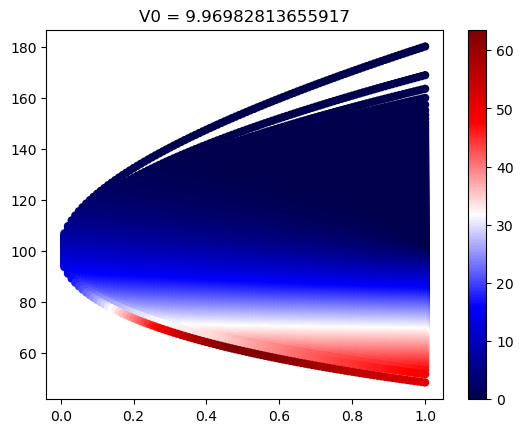

In [24]:
plt.scatter(x = (np.tile(np.arange(1,values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = (mesh).flatten(), c = Q.flatten(), cmap = 'seismic', linewidth=0)
plt.colorbar()
plt.title(f'V0 = {V}')

In [25]:
barrier = 80
put_down_out = Option(underlying, lambda X,t: np.maximum(K-X, 0), T, lambda X,t: X > barrier)

In [26]:
V, bools, mesh, Q = stochastic_mesh(put_down_out, b, True)

Text(0.5, 1.0, 'V0 = 9.005721612895377')

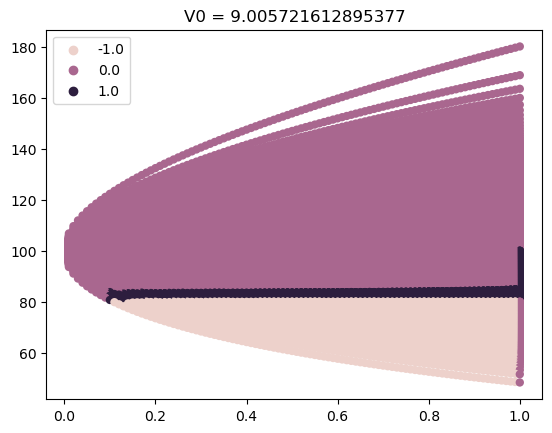

In [27]:
sb.scatterplot(x = (np.tile(np.arange(1, values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = mesh.flatten(), hue = bools.flatten(),linewidth=0).set_title(f'V0 = {V}')

Text(0.5, 1.0, 'V0 = 9.005721612895377')

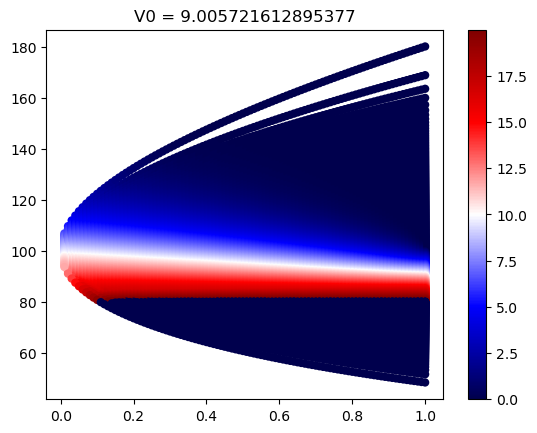

In [28]:
plt.scatter(x = (np.tile(np.arange(1,values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = (mesh).flatten(), c = Q.flatten(), cmap = 'seismic', linewidth=0)
plt.colorbar()
plt.title(f'V0 = {V}')

In [29]:
barrier = 80
put_up_in = Option(underlying, lambda X,t: np.maximum(K-X, 0), T, lambda X,t: X > barrier, False)

In [30]:
V, bools, mesh, Q = stochastic_mesh(put_up_in, b, True)

Text(0.5, 1.0, 'V0 = 9.139812591331982')

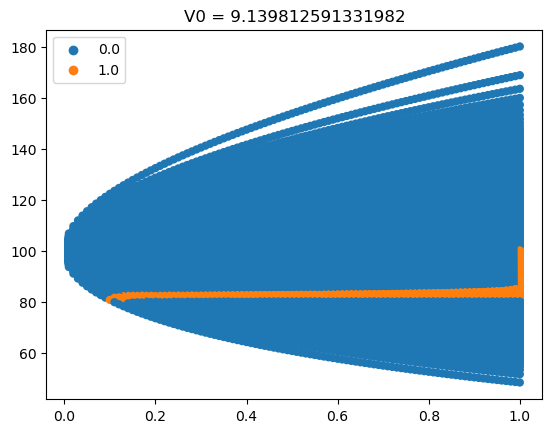

In [31]:
sb.scatterplot(x = (np.tile(np.arange(1, values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = mesh.flatten(), hue = bools.flatten(),linewidth=0).set_title(f'V0 = {V}')

Text(0.5, 1.0, 'V0 = 9.139812591331982')

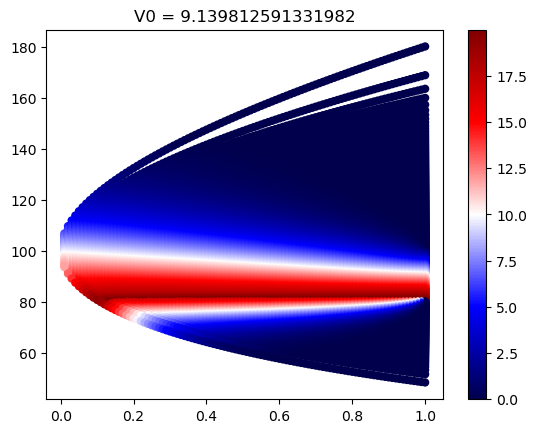

In [32]:
plt.scatter(x = (np.tile(np.arange(1,values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = (mesh).flatten(), c = Q.flatten(), cmap = 'seismic', linewidth=0)
plt.colorbar()
plt.title(f'V0 = {V}')

In [33]:
put_down_out = Option(underlying, lambda X,t: np.maximum(K-X, 0), T, lambda X,t: X > 90 - 20*t)

In [34]:
V, bools, mesh, Q = stochastic_mesh(put_down_out, b, True)

Text(0.5, 1.0, 'V0 = 7.995097268504406')

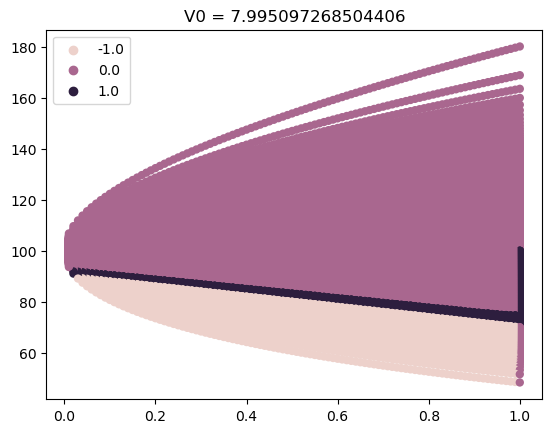

In [35]:
sb.scatterplot(x = (np.tile(np.arange(1, values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = mesh.flatten(), hue = bools.flatten(),linewidth=0).set_title(f'V0 = {V}')

Text(0.5, 1.0, 'V0 = 7.995097268504406')

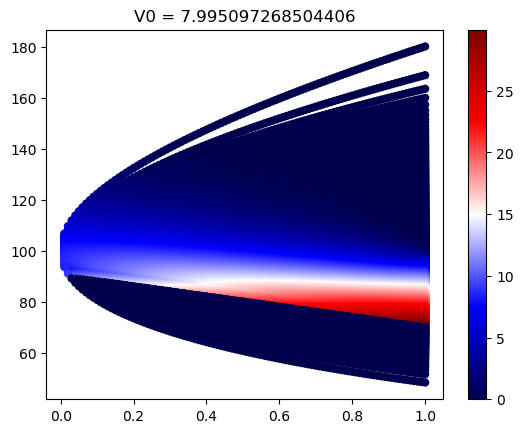

In [36]:
plt.scatter(x = (np.tile(np.arange(1,values_per_year * T + 1) / values_per_year, (b,1))).flatten(),y = (mesh).flatten(), c = Q.flatten(), cmap = 'seismic', linewidth=0)
plt.colorbar()
plt.title(f'V0 = {V}')

In [37]:
bs = range(1,12)
exercises = range(2, 10, 2)
Vs = pd.DataFrame(index = bs, columns = [f'exercises per year = 2^{e}' for e in exercises])
for b in bs:
    for e in exercises:
        underlying = GBM(S0, mu, sigma, r, div = 30, div_freq = 1, next_div_moment = 0.5, values_per_year = 2**e)
        vanilla_call = Option(underlying, lambda X,t: np.maximum(X-K, 0), T)
        price, _, _, _ = stochastic_mesh(vanilla_call, 2**b, True)
        Vs.loc[b, f'exercises per year = 2^{e}'] = price

NameError: name 'div_interval' is not defined

In [ ]:
Vs.plot(style = '-o')
plt.legend(loc = 'lower left')
plt.hlines(xmin = 1, xmax = len(bs), y = 6.888402, linestyles = 'dashed', color = 'black')

In [101]:
bs = range(1,12)
exercises = range(2, 10, 2)
Vs = pd.DataFrame(index = bs, columns = [f'exercises per year = 2^{e}' for e in exercises])
for b in bs:
    for e in exercises:
        underlying = GBM(S0, mu, sigma, r, div = 30, div_freq = 1, next_div_moment = 0.5, values_per_year = 2**e)
        vanilla_put = Option(underlying, lambda X,t: np.maximum(K-X, 0), T)
        price, _, _, _ = stochastic_mesh(vanilla_put, 2**b, True)
        Vs.loc[b, f'exercises per year = 2^{e}'] = price

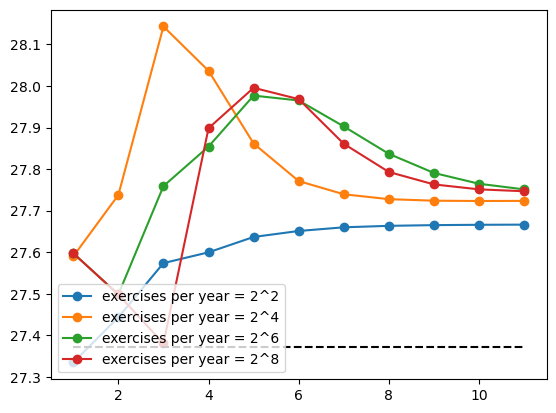

In [102]:
Vs.plot(style = '-o')
plt.legend(loc = 'lower left')
plt.hlines(xmin = 1, xmax = len(bs), y = 27.37238, linestyles = 'dashed', color = 'black')